# App Reviews Sentiment Analysis 

App Reviews Sentiment Analysis means evaluating and understanding the sentiments expressed in user reviews of mobile applications . 

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\linkedin-reviews.csv")

In [6]:
df.head() 

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis 


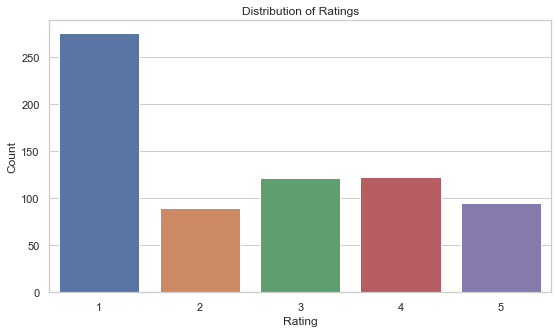

In [9]:
# Plotting the distribution of ratings 
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , 
             x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Now we will analyze the length of the reviews , as this can sometimes correlate with the sentiment or detail of feedback . We will first calculate the length of each review and the visualize the data . 

In [10]:
df['Review Length'] = df['Review'].apply(len) 

In [11]:
df.head(3)


,Review,Rating,Review Length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61


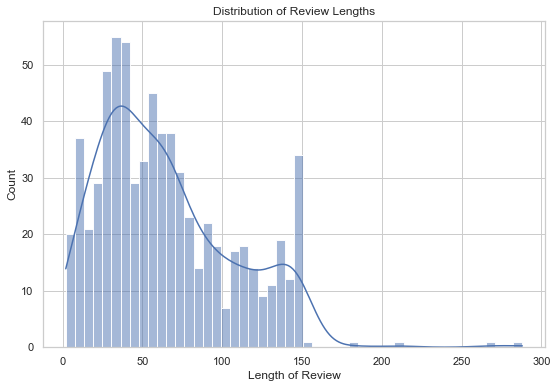

In [12]:
# Plotting the distribution of review lengths 
plt.figure(figsize = (9,6))
sns.histplot(df['Review Length'], bins = 50 , kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count') 
plt.show() 

# Adding Sentiment Labels in the Data 
We will use Textblob library. Textblob library provides a polarity score raning from -1(very negative) to +1(very positive) for a given text . We can use this score to classify each review's sentiment as positive, negative or neutral. 

!pip install textblob 

In [13]:
from textblob import TextBlob 

In [14]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment 
    if sentiment.polarity > 0.1 :
        return 'Positive' 
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral'

In [15]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [16]:
df.head() 

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


# Analyzing App Reviews Sentiments 

In [17]:
sentiment_distribution = df['Sentiment'].value_counts() 

In [18]:
sentiment_distribution

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

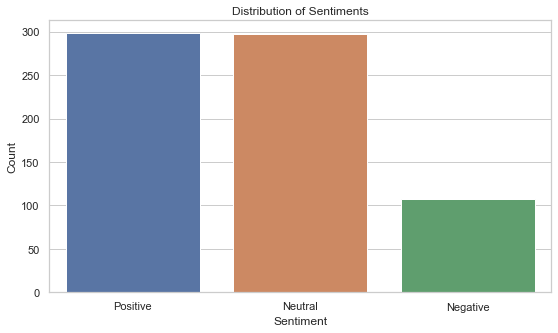

In [19]:
#Plotting the distribution of sentiments
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show() 

# So, we can see although the app has low ratings , still the reviewers don't use many negative words in the reviews for the app . 

Now , we will explore the relationship between the sentiments and the ratings . This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical ratings . 

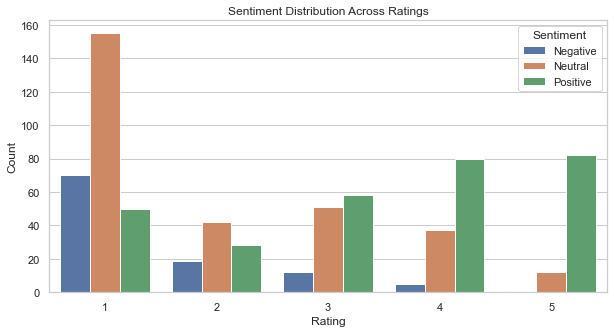

In [20]:
plt.figure(figsize = (10,5)) 
sns.countplot(data = df , 
             x = 'Rating',
             hue = 'Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show() 

# Summary 

So , App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback , prioritze feature updates , and maintain a positive user community . 